In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
model="deepseek-r1-distill-llama-70b"

In [3]:
from langchain_groq import ChatGroq


In [4]:
llm=ChatGroq(model_name=model)

In [7]:
llm.invoke("which model are you ? gove me complete name")

AIMessage(content="<think>\nI'm DeepSeek-R1, an AI assistant created exclusively by the Chinese Company DeepSeek. I'll do my best to help you.\n</think>\n\nI'm DeepSeek-R1, an AI assistant created exclusively by the Chinese Company DeepSeek. I'll do my best to help you.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 13, 'total_tokens': 74, 'completion_time': 0.293017184, 'prompt_time': 0.000389902, 'queue_time': 0.054108178, 'total_time': 0.293407086}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--da2e9f21-64b5-4fb7-b5ba-1e7bf5101675-0', usage_metadata={'input_tokens': 13, 'output_tokens': 61, 'total_tokens': 74})

In [8]:
print(llm.invoke("hi").content)

<think>

</think>

Hello! How can I assist you today? 😊


In [9]:
import operator
from typing import List
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from pydantic import BaseModel , Field
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode

In [10]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [11]:
HumanMessage("hi how are you?")

HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={})

In [12]:
HumanMessage(["hi how are you?"])

HumanMessage(content=['hi how are you?'], additional_kwargs={}, response_metadata={})

### this code is only for the testing

In [13]:

state={"messages":["hi hello how are you?"]}
call_model(state)

{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 9, 'total_tokens': 47, 'completion_time': 0.1778959, 'prompt_time': 0.000178086, 'queue_time': 0.053026804, 'total_time': 0.178073986}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--a961738b-9ba6-4370-9cf9-f2ec0f2f15d4-0', usage_metadata={'input_tokens': 9, 'output_tokens': 38, 'total_tokens': 47})]}

In [ ]:
# from langchain_core.messages import AnyMessage
# # class MessagesState(TypedDict):
# #     messages: Annotated[list[AnyMessage], add_messages]


# class AgentState(TypedDict):
#     messages: Annotated[Sequence[BaseMessage], operator.add]

In [14]:
workflow=StateGraph(MessagesState)

In [15]:
workflow.add_node("mybot",call_model)

In [16]:
workflow.add_edge(START,"mybot")

In [18]:
workflow.add_edge("mybot",END)

In [19]:
app=workflow.compile()

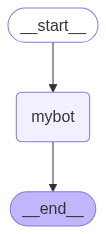

In [20]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
input={"messages":["hi hello how are you?"]}

In [22]:
app.invoke(input)

{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='2c46a31a-2cd3-4ed4-847b-1441b6ffa374'),
  AIMessage(content="<think>\n\n</think>\n\nHi! Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are *you* doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 9, 'total_tokens': 55, 'completion_time': 0.203062346, 'prompt_time': 0.000195366, 'queue_time': 0.055392833999999995, 'total_time': 0.203257712}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--846fc003-b117-4d75-bf2d-344f156badbd-0', usage_metadata={'input_tokens': 9, 'output_tokens': 46, 'total_tokens': 55})]}

In [23]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.187257857, 'prompt_time': 0.000219095, 'queue_time': 0.05421243, 'total_time': 0.187476952}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--6e3fd215-416f-4222-89f2-2e4659fec424-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}




In [25]:
@tool
def search(query:str):
    """this is my custom tool for searching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degree and sunny"
    return "the temp is 25 degree and cloudy"

In [26]:
search.invoke("what is a tempurature in kashmir?")

'the temp is 25 degree and cloudy'

In [27]:
search.invoke("what is a tempurature in delhi?")

'the temp is 45 degree and sunny'

In [28]:
search

StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000209A87DD260>)

In [29]:
llm.invoke("what is a weather in delhi?")

AIMessage(content='<think>\n\n</think>\n\nAs of my last update in July 2024, I cannot provide real-time weather information. However, Delhi experiences a humid subtropical climate with distinct seasons:\n\n- **Summer (March to June):** Hot with temperatures often reaching 40°C (104°F) or more.\n- **Monsoon (July to September):** Warm with heavy rainfall and high humidity.\n- **Winter (December to February):** Cool, with temperatures ranging from 2°C to 15°C (36°F to 59°F).\n- **Autumn (October to November) and Spring (February to March):** Mild and pleasant.\n\nFor the current weather in Delhi, please check a reliable weather service like the India Meteorological Department (IMD) or a weather app.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 158, 'prompt_tokens': 11, 'total_tokens': 169, 'completion_time': 0.574545455, 'prompt_time': 0.000576119, 'queue_time': 0.057695281, 'total_time': 0.575121574}, 'model_name': 'deepseek-r1-distill-llama-70b', 'sys

In [30]:
tools=[search]

In [31]:
llm_with_tool=llm.bind_tools(tools)

In [32]:
response=llm_with_tool.invoke("what is a weather is delhi?")

In [33]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '670ep57tn', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 169, 'prompt_tokens': 133, 'total_tokens': 302, 'completion_time': 0.81312402, 'prompt_time': 0.008555776, 'queue_time': 0.064657067, 'total_time': 0.821679796}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--e3383578-7d6d-4c2e-b9d4-94b9dfbe5e6c-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': '670ep57tn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 169, 'total_tokens': 302})

In [34]:
response.content

''

In [35]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': '670ep57tn',
  'type': 'tool_call'}]

In [36]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [37]:
input={"messages":["what is a weather in delhi?"]}

In [38]:
response=call_model(input)

In [39]:
response["messages"][-1].content

''

In [115]:
response["messages"][-1].tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': '5v4m56dw7',
  'type': 'tool_call'}]

In [40]:
def router_function(state:MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END
    

In [120]:
tools

[StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000020AA714F760>)]

In [41]:

tool_node=ToolNode(tools)

In [42]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'search': StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000209A87DD260>)}, tool_to_state_args={'search': {}}, tool_to_store_arg={'search': None}, handle_tool_errors=True, messages_key='messages')

In [43]:
workflow2=StateGraph(MessagesState)

In [44]:
workflow2.add_node("llmwithtool",call_model)

workflow2.add_node("mytools",tool_node)

In [45]:
workflow2.add_edge(START,"llmwithtool")

workflow2.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

In [46]:
app2=workflow2.compile()

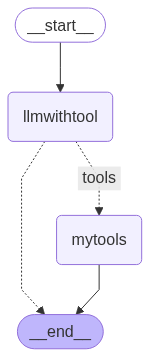

In [47]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [48]:
app2.invoke({"messages":["what is a weather in bengraluru?"]})

{'messages': [HumanMessage(content='what is a weather in bengraluru?', additional_kwargs={}, response_metadata={}, id='640d9e3e-774f-4f78-9f43-eaaec6a08e28'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'nv8pphbce', 'function': {'arguments': '{"query":"weather in Bengaluru"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 117, 'prompt_tokens': 135, 'total_tokens': 252, 'completion_time': 0.488485491, 'prompt_time': 0.008662106, 'queue_time': 0.05273417800000001, 'total_time': 0.497147597}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--35965127-6a7f-43a5-973b-f31c099f87ef-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Bengaluru'}, 'id': 'nv8pphbce', 'type': 'tool_call'}], usage_metadata={'input_tokens': 135, 'output_tokens': 117, 'total_tokens': 252}),
  ToolMessage(content='the temp is 25 degree and

In [49]:
app2.invoke({"messages":["what is a weather in delhi?"]})

{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='f02c220b-855e-4377-8b42-598c34e09669'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'h6mp0sxq1', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 170, 'prompt_tokens': 133, 'total_tokens': 303, 'completion_time': 0.714354785, 'prompt_time': 0.008556448, 'queue_time': 0.057234692, 'total_time': 0.722911233}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--336967fc-e5ae-4868-aef7-763e1eb9a948-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'h6mp0sxq1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 170, 'total_tokens': 303}),
  ToolMessage(content='the temp is 45 degree and sunny', name='search

In [50]:
app2.invoke({"messages":["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='39bb856c-2ad4-4ece-8dbf-4b69d846e946'),
  AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to assist you with whatever you need. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 145, 'prompt_tokens': 130, 'total_tokens': 275, 'completion_time': 0.527272727, 'prompt_time': 0.00843331, 'queue_time': 0.057630600000000004, 'total_time': 0.535706037}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--c5ac9096-3de4-402e-969f-869db776f1f9-0', usage_metadata={'input_tokens': 130, 'output_tokens': 145, 'total_tokens': 275})]}